In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits= load_digits()


In [4]:
print("image data shape",digits.data.shape)
print("Label data shape",digits.target.shape)

image data shape (1797, 64)
Label data shape (1797,)


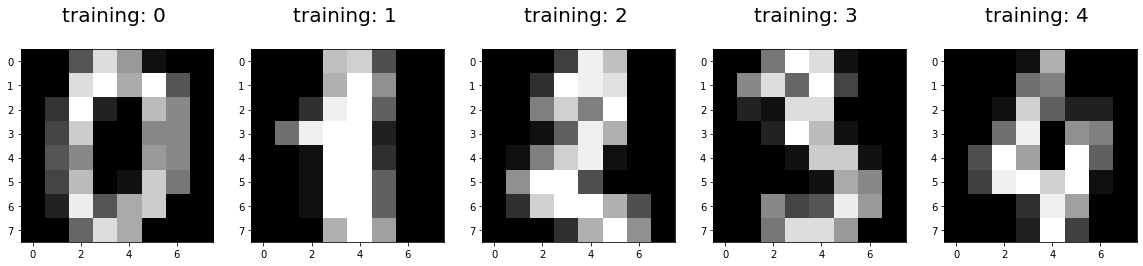

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training: %i \n' %label,fontsize=20)
    

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [9]:
print(x_train.shape)

(1383, 64)


In [11]:
print(y_train.shape)

(1383,)


In [13]:
print(x_test.shape)

(414, 64)


In [14]:
print(y_test.shape)

(414,)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logisticRegr= LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\KEERTI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KEERTI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [18]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [19]:
predictions = logisticRegr.predict(x_test)

In [20]:
score = logisticRegr.score(x_test,y_test)
print(score)

0.9420289855072463


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [22]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


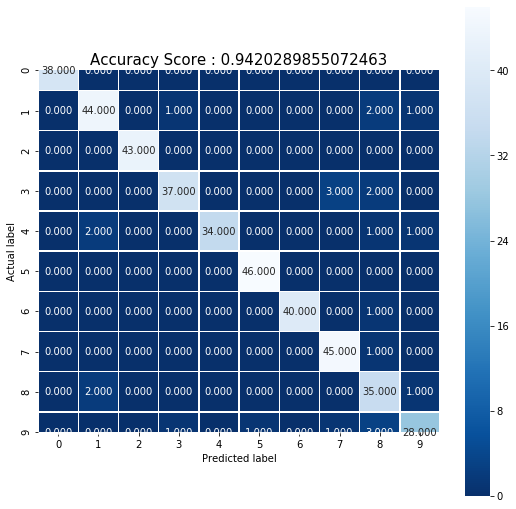

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=15);

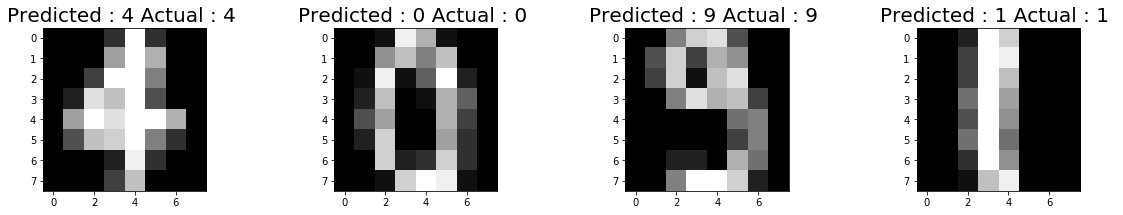

In [25]:
index= 0
classifiedIndex=[]
for predict, actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted : {} Actual : {} ".format(predictions[wrong],y_test[wrong]),fontsize=20)